In [1]:
!pip install selectivesearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for selectivesearch: filename=selectivesearch-0.4-py3-none-any.whl size=4349 sha256=3470990c539183717fb0a1dfd7951f97063e6f4e897fa5284dc3807ded1de2cd
  Stored in directory: /root/.cache/pip/wheels/83/0e/c9/4713ec9c1692e688f84fd3e80201018a02992949ca63697ba8
Successfully built selectivesearch


In [15]:
# 외부에 있는 이미지를 가져와서 해당 파일에 넣기
# 이미지가 불러와지지 않을 경우 해당 이미지를 직접 넣어야한다. (파일 끝에 ':'을 클릭해 업로드 가능)
!mkdir /content/data
!wget -o /content/data/audrey.jpg https://cdn.imweb.me/thumbnail/20220323/3722d50dfdff1.jpg

mkdir: cannot create directory ‘/content/data’: File exists


In [16]:
import selectivesearch
import cv2
import matplotlib.pyplot as plt
import os
 
# 노트북에서 바로 볼 수 있게 해주기 위해서 선언
%matplotlib inline 

img = cv2.imread('/content/data/audrey01.jpg')

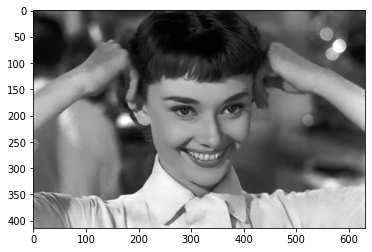

In [20]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # 이미지를 바꾸는 과정이 필요함
plt.imshow(img_rgb)

In [21]:
from selectivesearch.selectivesearch import selective_search

_, regions = selective_search(img_rgb, scale = 100, min_size = 2000)

In [ ]:
type(regions)

list

In [ ]:
len(regions)

61

In [ ]:
regions
# 아래로 갈수록 계속 합쳐져서 사이즈가 커짐
# ( , , , ) -> (x, y, width, height) 

[{'rect': (0, 0, 93, 107), 'size': 7474, 'labels': [0.0]},
 {'rect': (0, 0, 128, 131), 'size': 6535, 'labels': [1.0]},
 {'rect': (106, 0, 126, 110), 'size': 5417, 'labels': [2.0]},
 {'rect': (175, 0, 129, 194), 'size': 9955, 'labels': [3.0]},
 {'rect': (222, 0, 145, 103), 'size': 8172, 'labels': [4.0]},
 {'rect': (250, 0, 208, 72), 'size': 4038, 'labels': [5.0]},
 {'rect': (392, 0, 182, 108), 'size': 11038, 'labels': [6.0]},
 {'rect': (538, 0, 93, 108), 'size': 6733, 'labels': [7.0]},
 {'rect': (276, 3, 166, 133), 'size': 10375, 'labels': [8.0]},
 {'rect': (37, 47, 131, 95), 'size': 3329, 'labels': [9.0]},
 {'rect': (547, 55, 84, 96), 'size': 3621, 'labels': [10.0]},
 {'rect': (451, 63, 127, 64), 'size': 2378, 'labels': [11.0]},
 {'rect': (0, 74, 182, 155), 'size': 9314, 'labels': [12.0]},
 {'rect': (85, 74, 111, 156), 'size': 5937, 'labels': [13.0]},
 {'rect': (411, 76, 121, 125), 'size': 4053, 'labels': [14.0]},
 {'rect': (454, 89, 177, 142), 'size': 8653, 'labels': [15.0]},
 {'rect'

In [ ]:
# proposal 된 bounding box 추리기
cand_rects = [cand['rect'] for cand in regions] # regions 값을 돌면서 rect 값만 추출
print(cand_rects)

[(0, 0, 93, 107), (0, 0, 128, 131), (106, 0, 126, 110), (175, 0, 129, 194), (222, 0, 145, 103), (250, 0, 208, 72), (392, 0, 182, 108), (538, 0, 93, 108), (276, 3, 166, 133), (37, 47, 131, 95), (547, 55, 84, 96), (451, 63, 127, 64), (0, 74, 182, 155), (85, 74, 111, 156), (411, 76, 121, 125), (454, 89, 177, 142), (193, 122, 181, 235), (296, 122, 122, 176), (243, 131, 161, 84), (411, 148, 220, 167), (262, 170, 90, 100), (15, 172, 159, 241), (0, 185, 65, 161), (161, 186, 73, 164), (305, 187, 271, 164), (130, 273, 182, 140), (532, 279, 99, 42), (463, 320, 168, 93), (412, 340, 84, 73), (261, 342, 158, 71), (0, 345, 71, 68), (250, 0, 208, 136), (412, 320, 219, 93), (85, 0, 147, 230), (243, 131, 161, 139), (130, 273, 289, 140), (411, 148, 220, 173), (175, 0, 283, 194), (296, 122, 280, 229), (0, 0, 232, 230), (538, 0, 93, 151), (0, 74, 182, 339), (296, 122, 335, 229), (193, 122, 211, 235), (392, 0, 239, 151), (0, 0, 234, 350), (392, 0, 239, 201), (296, 0, 335, 351), (130, 273, 501, 140), (451, 

In [ ]:
green_rgb = (125, 255, 51) # bounding box color
img_rgb_copy = img_rgb.copy() # original 이미지를 보존하기 위해서 copy 해서 보통 사용

for rect in cand_rects :

  x1 = rect[0]
  y1 = rect[1]
  x2 = x1 + rect[2]
  y2 = y1 + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (x1, y1), (x2, y2), color = green_rgb, thickness = 1)


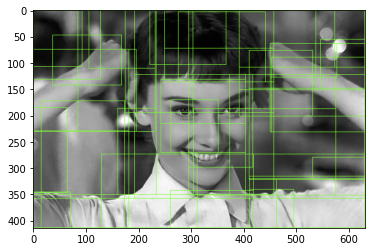

In [ ]:
plt.imshow(img_rgb_copy)

[(0, 0, 128, 131), (106, 0, 126, 110), (85, 0, 219, 230), (222, 0, 236, 103), (392, 0, 239, 201), (538, 0, 93, 108), (276, 3, 166, 133), (0, 47, 182, 182), (451, 63, 180, 168), (193, 122, 211, 235), (296, 122, 280, 229), (411, 148, 220, 173), (0, 172, 234, 241), (0, 185, 65, 161), (130, 273, 182, 140), (412, 320, 219, 93), (261, 342, 158, 71), (130, 273, 289, 140), (392, 0, 239, 201), (392, 0, 239, 321), (222, 0, 236, 136), (0, 0, 232, 131), (0, 0, 458, 136), (0, 0, 458, 230), (296, 0, 335, 351), (130, 273, 501, 140), (0, 122, 404, 291), (0, 47, 182, 299), (0, 47, 404, 366), (296, 0, 335, 351), (0, 0, 631, 351), (0, 0, 631, 413), (0, 0, 631, 413)]


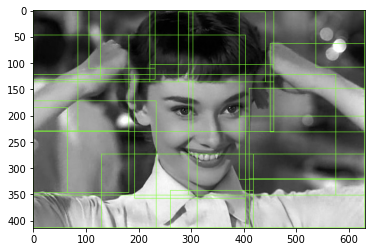

In [ ]:
from selectivesearch.selectivesearch import selective_search

_, regions = selective_search(img_rgb, scale = 100, min_size = 5000) ## size가 5000이상 되는 bounding box중에 값이 큰것만 보여줘

# proposal 된 bounding box 추리기
cand_rects = [cand['rect'] for cand in regions] # regions 값을 돌면서 rect 값만 추출
print(cand_rects)

green_rgb = (125, 255, 51) # bounding box color
img_rgb_copy = img_rgb.copy() # original 이미지를 보존하기 위해서 copy 해서 보통 사용

for rect in cand_rects :

  x1 = rect[0]
  y1 = rect[1]
  x2 = x1 + rect[2]
  y2 = y1 + rect[3]

  img_rgb_copy = cv2.rectangle(img_rgb_copy, (x1, y1), (x2, y2), color = green_rgb, thickness = 1)

  plt.imshow(img_rgb_copy)
